In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/SUNPHARMA.NS (1).csv')
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
18,2020-07-27,484.850006,487.600006,469.000000,475.500000,474.596008,6112617
19,2020-07-28,475.500000,483.750000,473.250000,482.600006,481.682526,5917155
20,2020-07-29,485.700012,496.299988,484.149994,493.000000,492.062744,8531803
21,2020-07-30,493.200012,513.200012,487.299988,509.950012,508.980530,17534819
22,2020-07-31,514.250000,541.000000,507.500000,531.700012,530.689148,41253676


In [3]:
dates=[]
prices=[]


In [4]:
#get the no. of rows and columns in the data set
df.shape

(23, 7)

In [5]:
#print all of the data except for the last row
df=df.head(len(df)-1)
print(df.shape)

(22, 7)


In [6]:
df_dates=df.loc[:,'Date'] # get all rows from date column 
df_Adj_close=df.loc[:,'Adj Close']#get all rows of Adj Close

In [7]:
for date in df_dates:
   dates.append([int(date.split('-')[2])])

#create the dependent data set 'y' as prices
for close_price in df_Adj_close:
   prices.append(float(close_price))

In [8]:
print(dates)

[[1], [2], [3], [6], [7], [8], [9], [10], [13], [14], [15], [16], [17], [20], [21], [22], [23], [24], [27], [28], [29], [30]]


In [9]:
#function to make prediction using 3 different kernals
def predict_prices(dates, prices, x): #x is testing date for test model  
    svr_lin=SVR(kernel='linear', C=1e3)
    svr_poly=SVR(kernel='poly', C=1e3,degree=2)
    svr_rbf=SVR(kernel='rbf', C=1e3, gamma=0.1)

    #TRAIN the models on the dates and prices
    svr_lin.fit(dates,prices)
    svr_poly.fit(dates,prices)
    svr_rbf.fit(dates,prices)
   
    #plot the graph 
    plt.scatter(dates,prices,color='blue',label='Data',s=60)
    plt.scatter(dates,svr_rbf.predict(dates),color='black',label='RBF model')
    plt.scatter(dates,svr_lin.predict(dates),color='green',label='Linear Model')
    plt.scatter(dates,svr_poly.predict(dates),color='yellow',label='Polynomial model')
    plt.xlabel('Date')
    plt.ylabel('price')
    plt.title('Support vactor Regression (sun pharma Data)')
    plt.legend()
    plt.show()
    return svr_rbf.predict(x)[0],svr_lin.predict(x)[0],svr_poly.predict(x)[0]


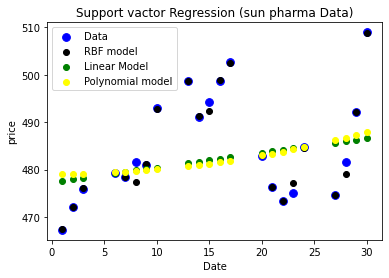

(522.757896525818, 486.9506067775867, 488.5080803581841)


In [10]:
predicted_price = predict_prices(dates,prices,[[31]])
print(predicted_price)